In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json
import os
import sys
sys.path.append("../../src")

from Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot

2023-02-12 20:55:02.810939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 20:55:02.942370: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-12 20:55:03.852288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/bwhpc/common/devel/cuda/11.8/lib64
2023-02-12 20:55:03.852367: W tensorflow/compil

In [2]:
path_reports = "../../results/without_augmentation"

In [3]:
path_train_individual_encoder = os.path.join(path_reports, 'train__Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_11_datasets.csv')
path_train_individual_fcn = os.path.join(path_reports, 'train__FCN_FCN_FCN_FCN_FCN_FCN_FCN_FCN_FCN_FCN_11_datasets.csv')
path_train_individual_mlp = os.path.join(path_reports, 'train__MLP_MLP_MLP_MLP_MLP_MLP_MLP_MLP_MLP_MLP_11_datasets.csv')
path_train_individual_resnet = os.path.join(path_reports, 'train__Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_11_datasets.csv')

In [4]:
df_train_individual_encoder = pd.read_csv(path_train_individual_encoder)
df_train_individual_fcn =pd.read_csv(path_train_individual_fcn)
df_train_individual_mlp =pd.read_csv(path_train_individual_mlp)
df_train_individual_resnet =pd.read_csv(path_train_individual_resnet)

In [5]:
path_train_encoder10 = os.path.join(path_reports, 'test_Encoder10.csv')
path_train_fcn10 = os.path.join(path_reports, 'test_FCN10.csv')
path_train_mlp10 = os.path.join(path_reports, 'test_MLP10.csv')
path_train_nne10 = os.path.join(path_reports, 'test_NNE.csv')
path_train_resnet10 = os.path.join(path_reports, 'test_Resnet10.csv')

In [6]:
df_train_encoder10 = pd.read_csv(path_train_encoder10)
df_train_fcn10 =pd.read_csv(path_train_fcn10)
df_train_mlp10 =pd.read_csv(path_train_mlp10)
df_train_nne =pd.read_csv(path_train_nne10)
df_train_resnet10 = pd.read_csv(path_train_resnet10)
df_train_all_ensembles = pd.concat([df_train_encoder10, df_train_fcn10, df_train_mlp10, df_train_nne, df_train_resnet10])

In [7]:
def group_df(df):
    return df.groupby(['model_name',], as_index=False)\
                .mean()[['model_name', 'test_acc']]\
                .sort_values(by=['test_acc'], ascending=False)\
                .rename(columns={"test_acc": "avg_test_acc"})

/scratch/slurm_tmpdir/job_21773437/ipykernel_3105401/1901821924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.groupby(['model_name',], as_index=False)\
/scratch/slurm_tmpdir/job_21773437/ipykernel_3105401/1901821924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.groupby(['model_name',], as_index=False)\
/scratch/slurm_tmpdir/job_21773437/ipykernel_3105401/1901821924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

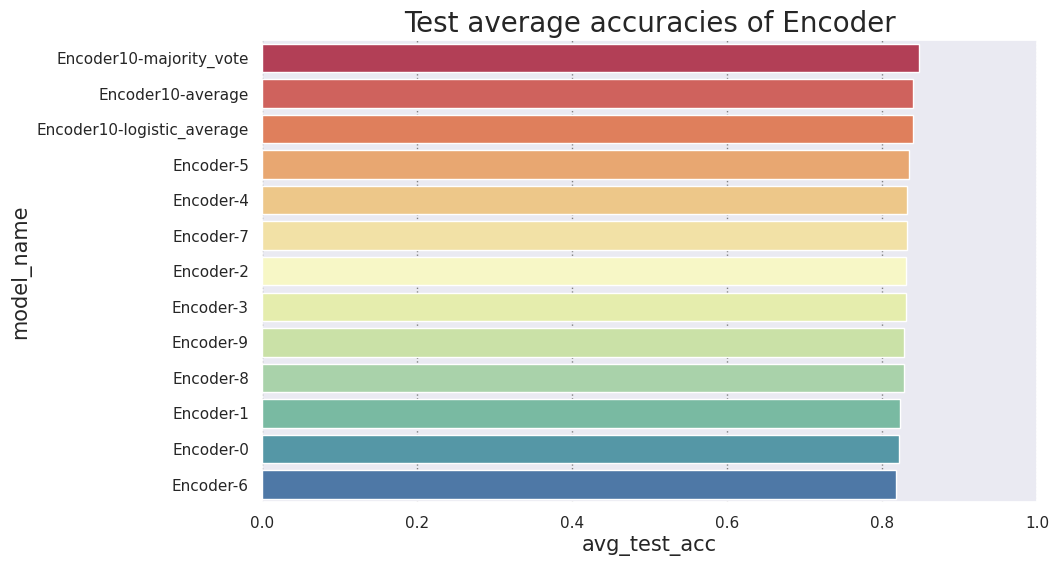

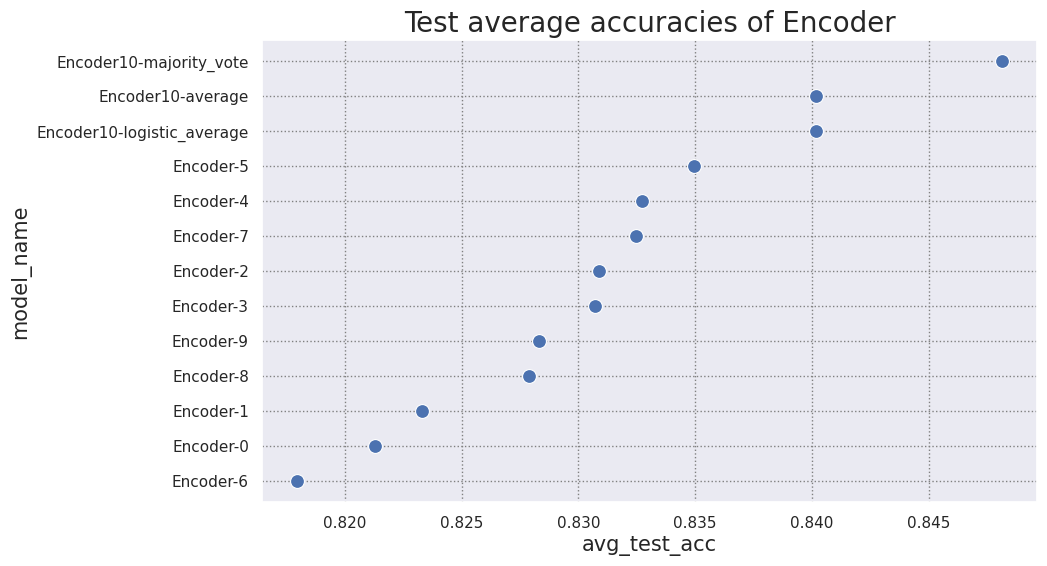

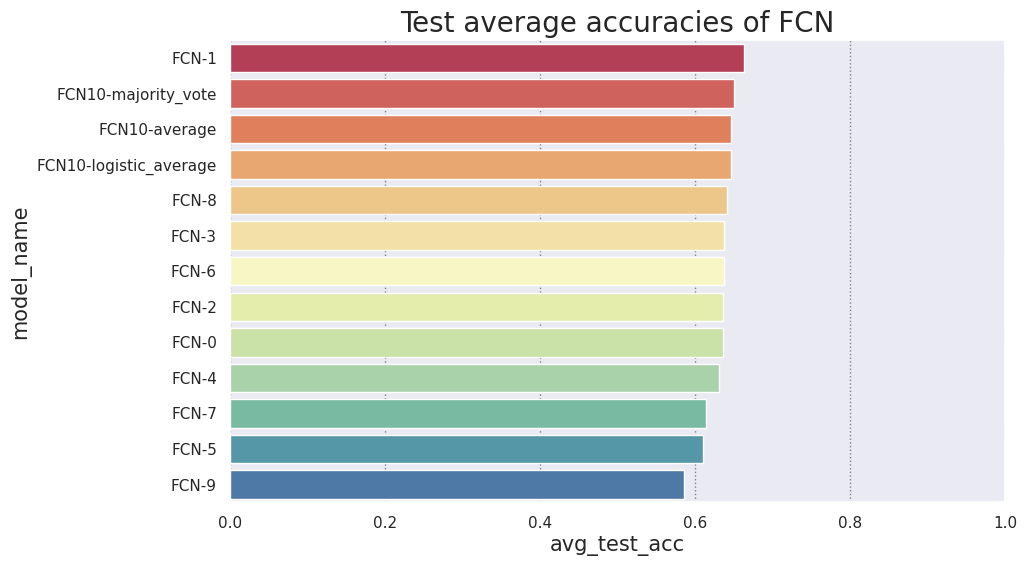

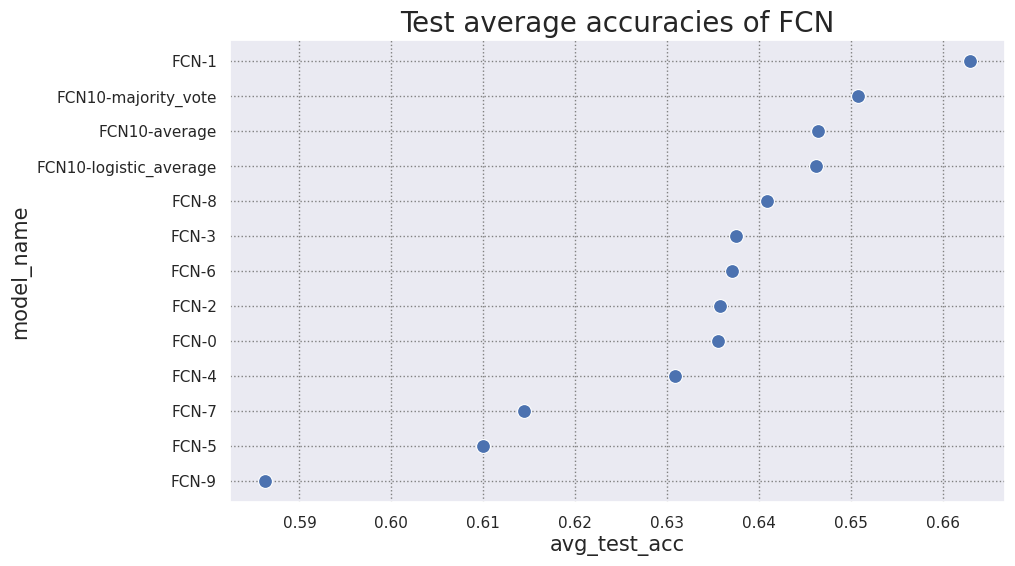

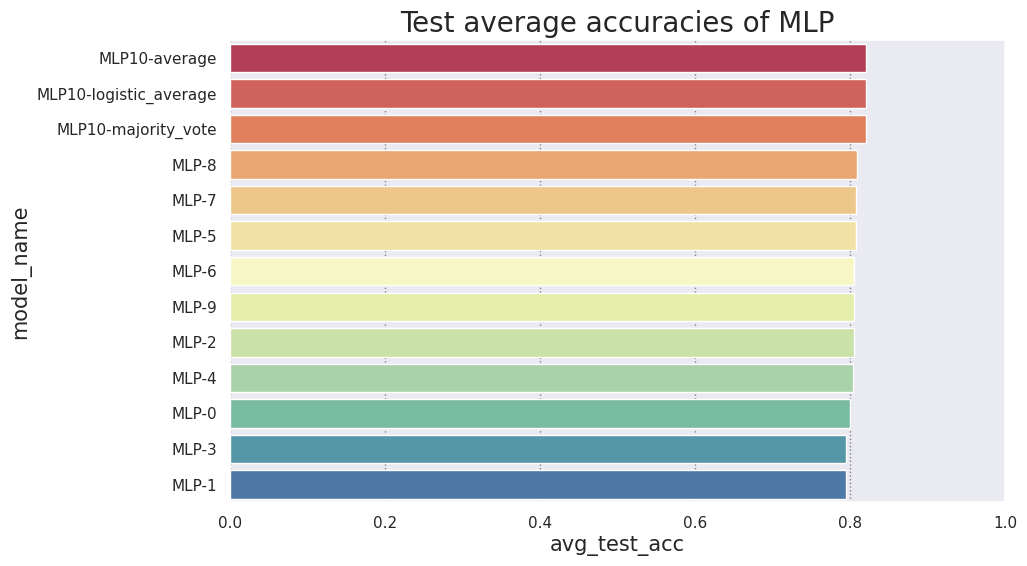

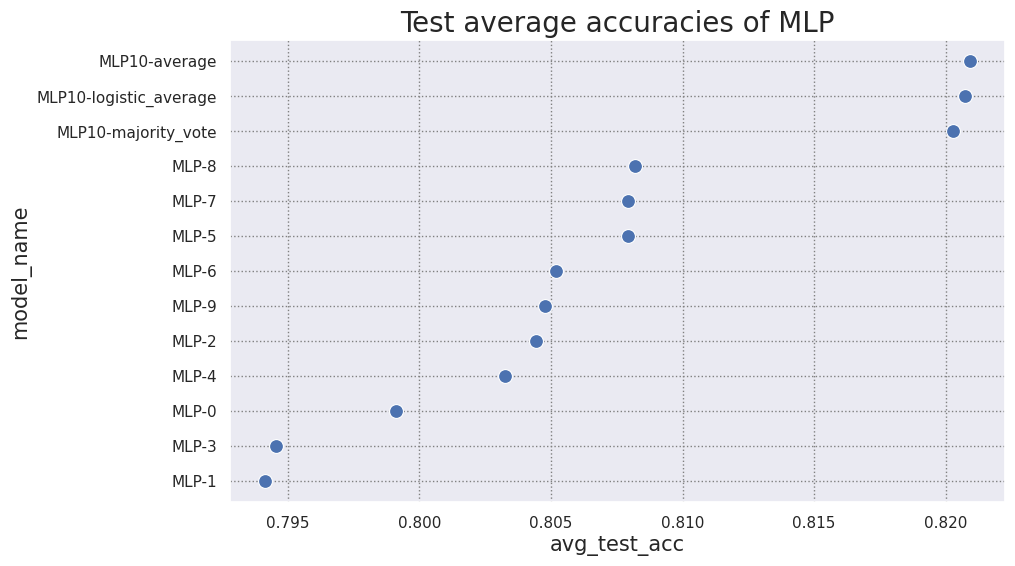

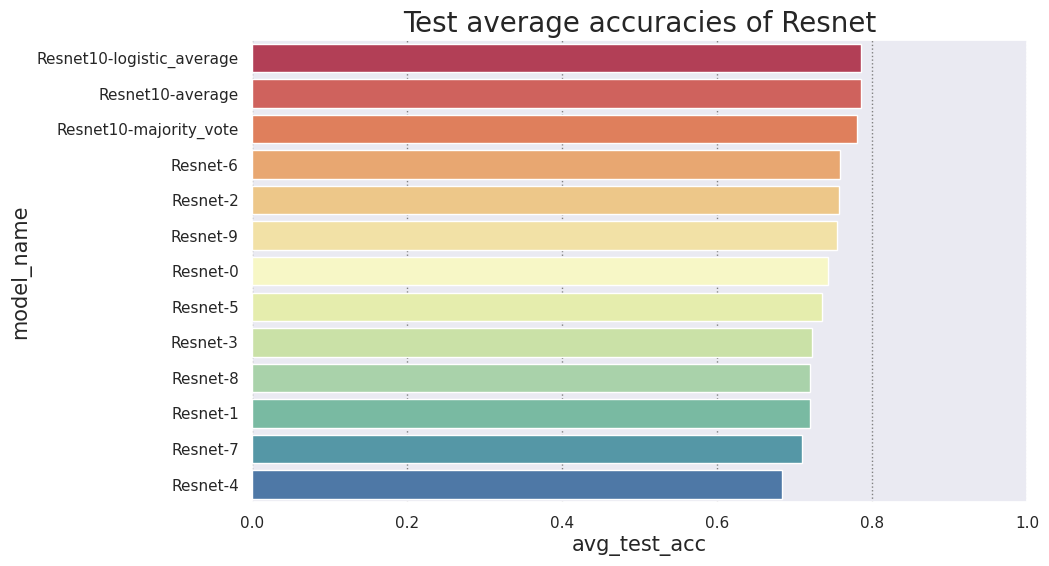

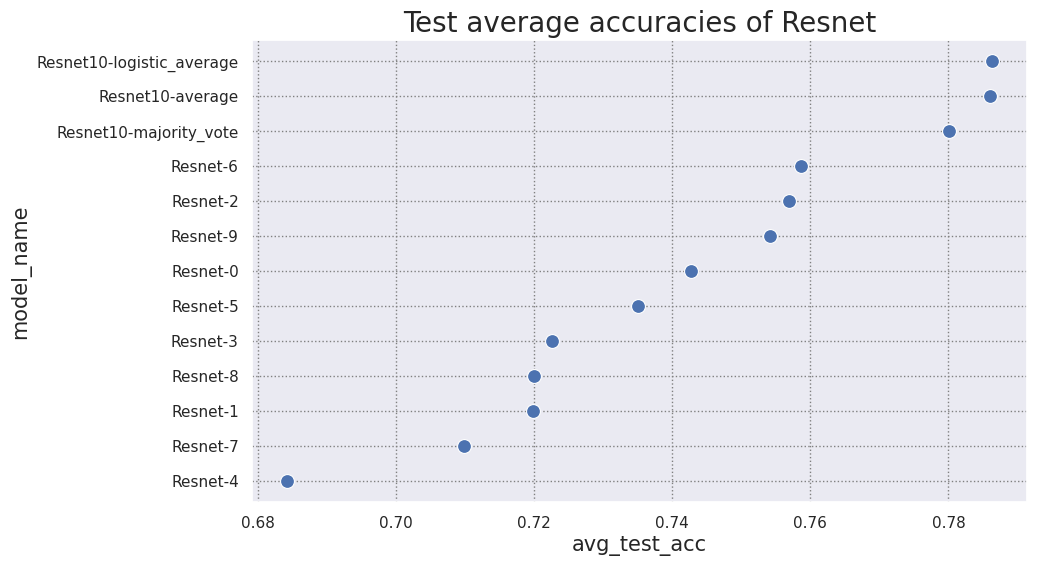

In [8]:
for train_individual, ensemble, name in \
        zip([df_train_individual_encoder, df_train_individual_fcn, df_train_individual_mlp, df_train_individual_resnet],\
            [df_train_encoder10, df_train_fcn10, df_train_mlp10, df_train_resnet10],\
            ["Encoder", "FCN", "MLP", "Resnet"]):
    train_individual_grouped = group_df(train_individual)
    ensemble_grouped = group_df(ensemble)
    df_to_display = pd.concat([train_individual_grouped, ensemble_grouped])
    df_to_display = df_to_display.sort_values(by=['avg_test_acc'], ascending=False)
    plot_accuracies_bar_plot(df_to_display, title=f'Test average accuracies of {name}')
    plot_accuracies_scatter_plot(df_to_display, title=f'Test average accuracies of {name}')